参考资料：[南丁格尔玫瑰图](https://antv-2018.alipay.com/zh-cn/vis/chart/rose.html)

南丁格尔玫瑰图又名鸡冠花图、极坐标区域图，是南丁格尔在克里米亚战争期间提交的一份关于士兵死伤的报告时发明的一种图表。

南丁格尔玫瑰图是在极坐标下绘制的柱状图，使用圆弧的半径长短表示数据的大小（数量的多少）。

- 由于半径和面积的关系是平方的关系，南丁格尔玫瑰图会将数据的比例大小夸大，尤其适合对比大小相近的数值。

- 由于圆形有周期的特性，所以玫瑰图也适用于表示一个周期内的时间概念，比如星期、月份。

英文名： Nightingale Rose Chart, Coxcomb Chart, Polar Area Diagram

In [1]:
# 使用 Plotly 进行可视化

'''

开源免费， 基于 MIT

'''

参考资料:[Wind Rose and Polar Bar Charts in Python]( https://plotly.com/python/wind-rose-charts/)

licence :https://plotly.com/python/is-plotly-free/

文档: [Python Figure Reference: barpolar Traces](https://plotly.com/python/reference/barpolar/)

In [6]:
import plotly.express as px 
df = px.data.wind() # 使用 px 内置数据

In [14]:
df.head()

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4


In [20]:
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength",
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [30]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=[77.5, 72.5, 70.0, 45.0, 22.5, 42.5, 40.0, 62.5],
    name='11-14 m/s',
    marker_color='rgb(106,81,163)'
))
fig.add_trace(go.Barpolar(
    r=[57.5, 50.0, 45.0, 35.0, 20.0, 22.5, 37.5, 55.0],
    name='8-11 m/s',
    marker_color='rgb(158,154,200)'
))
fig.add_trace(go.Barpolar(
    r=[40.0, 30.0, 30.0, 35.0, 7.5, 7.5, 32.5, 40.0],
    name='5-8 m/s',
    marker_color='rgb(203,201,226)'
))
fig.add_trace(go.Barpolar(
    r=[20.0, 7.5, 15.0, 22.5, 2.5, 2.5, 12.5, 22.5],
    name='< 5 m/s',
    marker_color='rgb(242,240,247)'
))

fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
fig.update_layout(
    title='Wind Speed Distribution in Laurel, NE',
    font_size=16,
    legend_font_size=16,
    polar_radialaxis_ticksuffix='%',
    polar_angularaxis_rotation=90,

)
fig.show()

**参数**

- name 


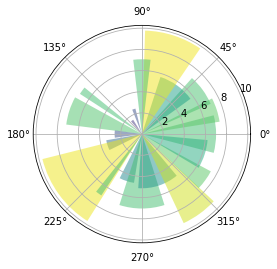

In [31]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

参考资料：[Bar chart on polar axis](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py)

0    12.13
1    14.59
2    18.77
3    13.97
4    18.00
5    15.38
6    20.56
7    23.60
Name: value, dtype: float64


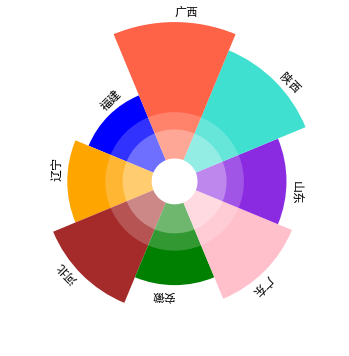

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
# 中国各省面积
# shuju={'acreade':['新疆','西藏','内蒙古','青海','四川'],'value':[166,122.8,118.3,72.23,48.14]}
shuju = {'acreade': ['福建', '辽宁', '河北', '安徽', '广东', '山东', '陕西', '广西'],
         'value': [12.13, 14.59, 18.77, 13.97, 18, 15.38, 20.56, 23.6]}
pdat = pd.DataFrame(shuju)
# print(pdat)

# 角度
l = pdat['value']
print(l)
N = pdat.shape[0]  # 总数
width = 2 * np.pi / N
rad = np.cumsum([width] * N)  # 每个扇形的起始角度

# color
# colors = ['darkgoldenrod', 'goldenrod', 'orange', 'gold', 'yellow']
colors = ['blue', 'orange', 'brown', 'green', 'pink', 'blueviolet', 'turquoise', 'tomato']

plt.figure(figsize=(6, 8))  # 创建画布
ax = plt.subplot(projection='polar')
# 删除不必要的内容
ax.set_ylim(-4, np.ceil(l.max() + 1))  # 中间空白
ax.set_theta_zero_location('N')  # 设置极坐标的起点（即0度）在正上方向
ax.grid(False)  # 不显示极轴
ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
ax.set_yticks([])  # 不显示坐标间隔
ax.set_thetagrids([])  # 不显示极轴坐标
# # 绘画
ax.bar(rad, l, width=width, color=colors, alpha=1)
ax.bar(rad, 5, width=width, color='white', alpha=0.3)  # 中间添加白色色彩使图案变浅
ax.bar(rad, 8, width=width, color='white', alpha=0.2)  # 中间添加白色色彩使图案变浅
# text
for i in np.arange(N):
    ax.text(rad[i],  # 角度
            l[i] + 1,  # 长度
            shuju['acreade'][i],  # 文本
            rotation=rad[i] * 180 / np.pi,  # 文字角度
            rotation_mode='anchor',  # this parameter is a trick
            alpha=1,
            fontweight='bold', size=12
            )

plt.show()